# Chebyshev Boundary Value Problem Example

This notebook shows how to use chebyshev expansions to solve a second order boundary value problem (BVP). I define a simple test function that represents the second derivative of another function that we want to find. Because the test function is simple, we can analytically integrate it twice to get the exact solution and compute the error of the chebyshev approximation.

In [17]:
from orthopoly.chebyshev import *
from numpy import *
from scipy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline

Define the functions, where $S = d^2F/dx^2$

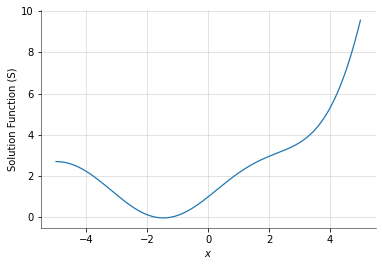

In [66]:
#the solution function
F = lambda x: sin(x) + exp(x/2) - x/3
#the source function (second derivative of F)
S = lambda x: -sin(x) + exp(x/2)/4
#domain to look at
xa = -5
xb = 5

x = linspace(xa, xb, 250)
plt.plot(x, F(x))
plt.xlabel('$x$')
plt.ylabel('Solution Function (S)')
plt.show()

In [81]:
#number of points to use
n = 16
#setup elements for solving BVP
xhat, θ, x, A = cheby_bvp_setup(xa, xb, n, 0, 2, 0)

In [82]:
#source array
b = zeros((n,))
b[0] = F(xa)
b[1:-1] = S(x[1:-1])
b[-1] = F(xb)

In [83]:
#solve for the coefficients of the solution cheby expansion
a = solve(A, b)
#evaluate the cheby solution and the exact solution
xx = linspace(xa, xb, 10000)
yexact = F(xx)
ycheby = cheby_sum(xx, a, xa, xb)

Maximum error = 6.2541e-08


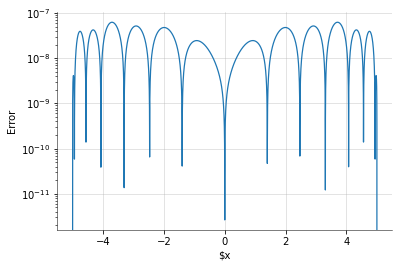

In [86]:
#compute and plot the relative error
err = abs(ycheby - yexact)
print('Maximum error = %g' % max(err))
plt.semilogy(xx, err)
plt.xlabel("$x")
plt.ylabel('Error')
plt.show()

With 16 points, the boundary value problem is solved with a maximum error of about a millionth of a percent!